# **Nilay Saxena**


---


*Data Science and Business Analytics Intern*

**The Sparks Foundation**


---


**Task #5** : Exploratory Data Analysis : Sports (*Indian Premier League*)

**Dataset** : matches.csv (link: https://bit.ly/34SRn3b)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
matches_data = pd.read_csv("matches.csv")
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries_data = pd.read_csv("deliveries.csv")
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
season_data=matches_data[['id','season','winner']]
complete_data=deliveries_data.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [7]:
matches_data.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [8]:
matches_data = matches_data.drop(columns=["umpire3"],axis=1)
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [9]:
wins_per_season = matches_data.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

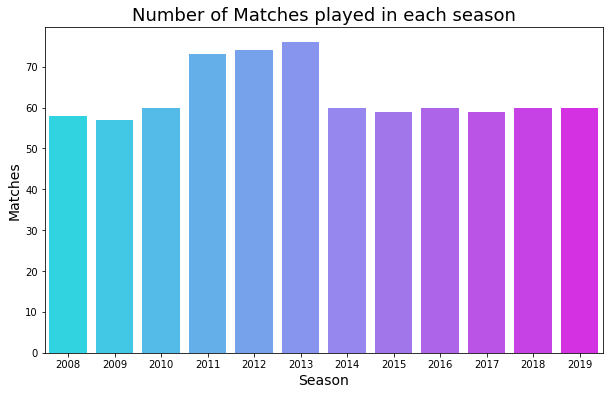

In [40]:
plt.figure(figsize = (10, 6))
sns.countplot('season',data=matches_data,palette="cool")
plt.title("Number of Matches played in each season",fontsize=18)
plt.xlabel("Season",fontsize=14)
plt.ylabel('Matches',fontsize=14)
plt.show()

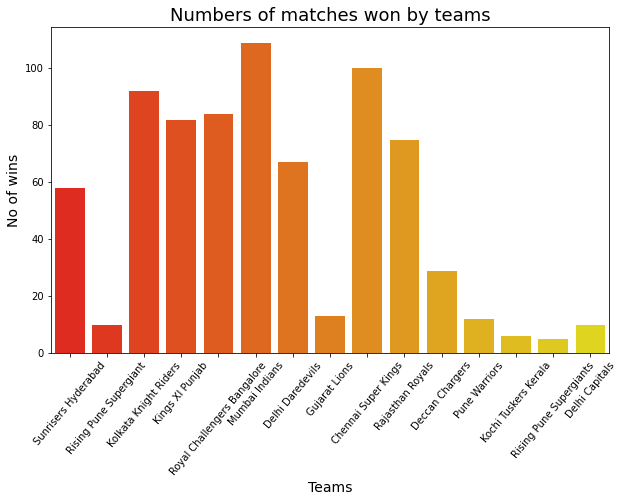

In [39]:
plt.figure(figsize = (10, 6))
sns.countplot(x='winner',data=matches_data, palette='autumn')
plt.title("Numbers of matches won by teams",fontsize=18)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=14)
plt.ylabel("No of wins",fontsize=14)
plt.show()

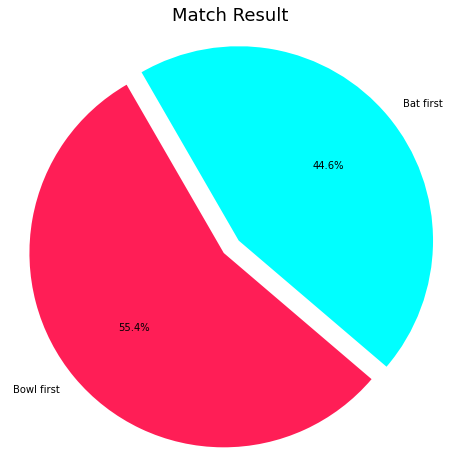

In [41]:
matches_data['win_by']=np.where(matches_data['win_by_runs']>0,'Bat first','Bowl first')
Win=matches_data.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#ff1e56', 'cyan']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=120, explode=(0.05, 0.05))
plt.title('Match Result',fontsize=18)
plt.axis('equal',fontsize=10)
plt.show()

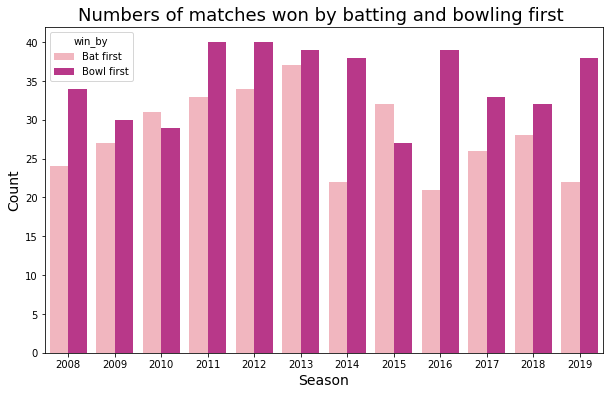

In [38]:
plt.figure(figsize = (10,6))
sns.countplot('season', hue='win_by', data=matches_data,palette='RdPu')
plt.title("Numbers of matches won by batting and bowling first ", fontsize=18)
plt.xlabel("Season",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

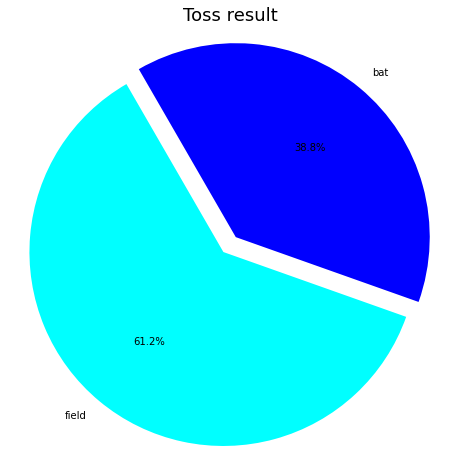

In [47]:
Toss_res=matches_data.toss_decision.value_counts()
labels=np.array(Toss_res.index)
sizes = Toss_res.values
colors = ['cyan', 'blue']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=120, explode=(0.05, 0.05))
plt.title('Toss result',fontsize=18)
plt.axis('equal',fontsize=10)
plt.show()

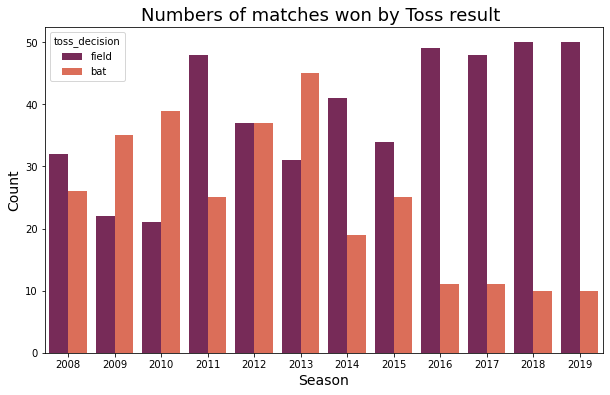

In [51]:
plt.figure(figsize = (10,6))
sns.countplot('season',hue='toss_decision',data=matches_data,palette='rocket')
plt.title("Numbers of matches won by Toss result ",fontsize=18)
plt.xlabel("Season",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

In [52]:
final_matches_res=matches_data.drop_duplicates(subset=['season'], keep='last')
final_matches_res[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


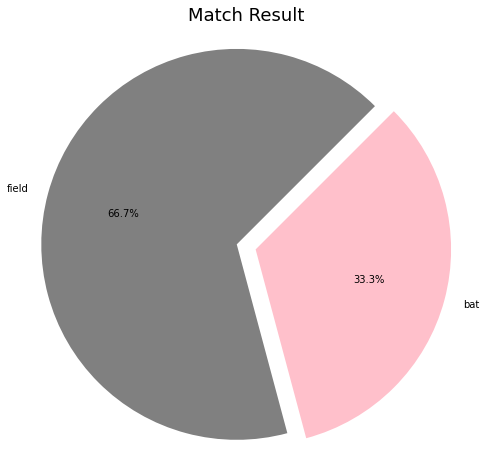

In [58]:
match = final_matches_res.win_by.value_counts()
labels=np.array(Toss_res.index)
sizes = match.values
colors = ['grey', 'pink']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=45, explode=(0.05, 0.05))
plt.title('Match Result',fontsize=18)
plt.axis('equal',fontsize=10)
plt.show()

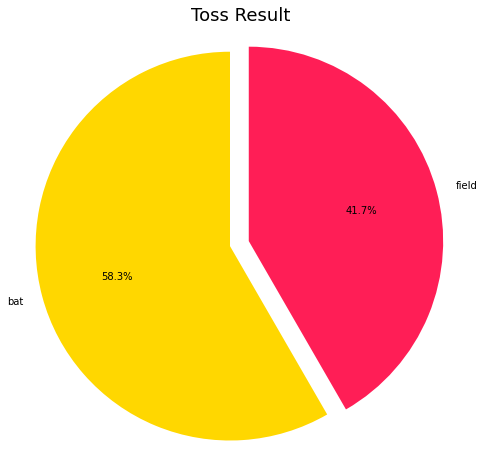

In [60]:
Toss_res=final_matches_res.toss_decision.value_counts()
labels=np.array(Toss_res.index)
sizes = Toss_res.values
colors = ['gold', '#ff1e56']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.05, 0.05))
plt.title('Toss Result',fontsize=18)
plt.axis('equal',fontsize=10)
plt.show()

<Figure size 720x432 with 0 Axes>

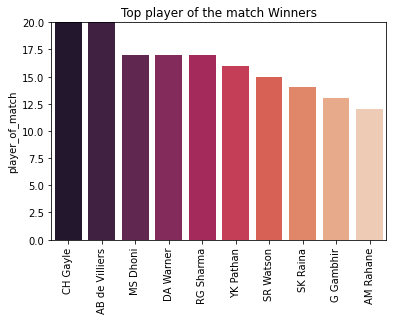

In [61]:
#BEST PLAYERS
plt.figure(figsize = (10,6))
top_players = matches_data.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="rocket");
plt.show()

In [63]:
#MATCH VENUE AND WINNERS WITH WIN COUNT
final_matches_res.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [64]:
#NO OF SEASONS WON BY TEAMS
final_matches_res["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

In [65]:
#TOSS WINNER, TOSS DECISION, FINALS WINNER
final_matches_res[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [66]:
#MAN OF THE MATCH
final_matches_res[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [67]:
len(final_matches_res[final_matches_res['toss_winner']==final_matches_res['winner']]['winner'])

9

In [70]:
four_data=complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


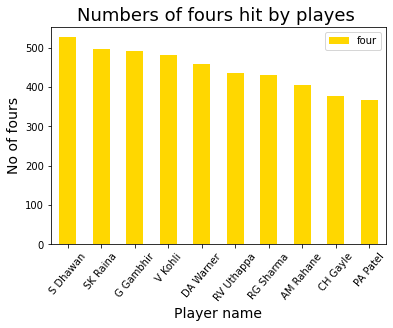

In [72]:
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='gold')
plt.title("Numbers of fours hit by playes ",fontsize=18)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=14)
plt.ylabel("No of fours",fontsize=14)
plt.show()

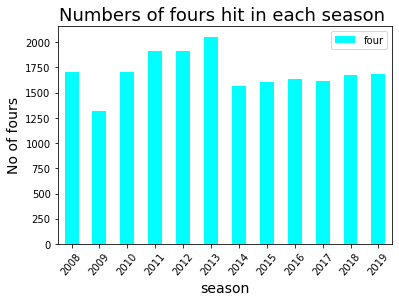

In [74]:
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'cyan')
plt.title("Numbers of fours hit in each season ",fontsize=18)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=14)
plt.ylabel("No of fours",fontsize=14)
plt.show()

In [75]:
six_data=complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


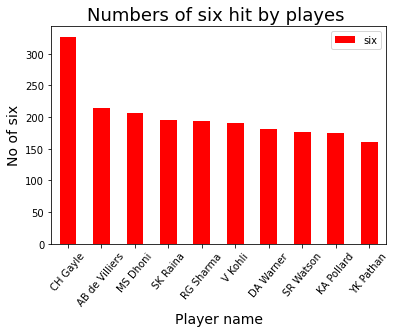

In [76]:
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='red')
plt.title("Numbers of six hit by playes ",fontsize=18)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=14)
plt.ylabel("No of six",fontsize=14)
plt.show()

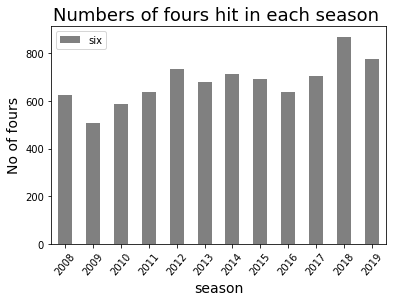

In [78]:
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'grey')
plt.title("Numbers of fours hit in each season ",fontsize=18)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=14)
plt.ylabel("No of fours",fontsize=14)
plt.show()

In [80]:
#TOP BATSMEN
batsman_score=deliveries_data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("Top 10 Run Scorers in IPL")
batsman_score.iloc[:10,:]

Top 10 Run Scorers in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [82]:
#NO OF MATCHES PLAYED BY EACH PLAYER
No_Matches_player= deliveries_data[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["Batsman","No_of Matches"]
No_Matches_player .head(5)

,Batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


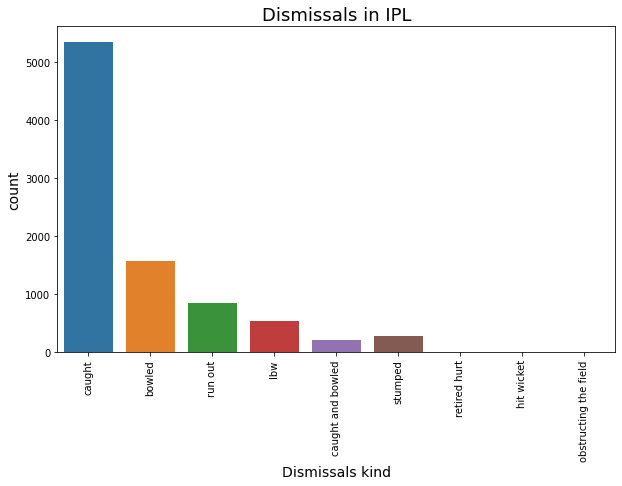

In [84]:
#METHODS OF DISMISSALS
plt.figure(figsize=(10,6))
ax=sns.countplot(deliveries_data.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=18)
plt.xlabel("Dismissals kind",fontsize=14)
plt.ylabel("count",fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [85]:
wicket_data=deliveries_data.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [86]:
#BEST BOWLERS
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


# **Conclusion**


---


1. The year 2013 had the most amount of matches played which is 76.

2. Mumbai Indians is the best team in IPL with the most number of wins and titles.

3. Chennai Super Kings has also performed very well with 3 titles.

4. Teams which Bowl first have a higher chances of winning than the team which bats first.

5. Teams usually choose fielding first after winning the toss. The is true for the finals as well.

6. In finals, the team which decides to do fielding first win the matches more then the team which decides to do batting first.

7. Chris Gayle and AB de Villiers are the best batsmen in IPL.

8. Kieron Pollard has the second best strike rate in IPL.

8. Out of 12 IPL finals, 9 times the team that won the toss was also the winner of IPL.

9. The highest number of four hit by player is Shikar Dhawan.

10. The highest number of six hit by player is CH gayle.

11. The batsmen with the most amount of runs scored is Virat Kohli.

12. Most batsmen in IPL are dismissed by Catch Out.

13. The bowler with the most number of wickets taken is Lasith Malinga.


---

